In [6]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("larsen0966/student-performance-data-set")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'student-performance-data-set' dataset.
Path to dataset files: /kaggle/input/student-performance-data-set


## Import Libraries

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import gradio as gr
import xgboost as xgb
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import GridSearchCV

## Read Dataset

In [8]:
data = pd.read_csv("/kaggle/input/student-performance-data-set/student-por.csv")
data

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,MS,F,19,R,GT3,T,2,3,services,other,...,5,4,2,1,2,5,4,10,11,10
645,MS,F,18,U,LE3,T,3,1,teacher,services,...,4,3,4,1,1,1,4,15,15,16
646,MS,F,18,U,GT3,T,1,1,other,other,...,1,1,1,1,1,5,6,11,12,9
647,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,6,10,10,10


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      649 non-null    object
 1   sex         649 non-null    object
 2   age         649 non-null    int64 
 3   address     649 non-null    object
 4   famsize     649 non-null    object
 5   Pstatus     649 non-null    object
 6   Medu        649 non-null    int64 
 7   Fedu        649 non-null    int64 
 8   Mjob        649 non-null    object
 9   Fjob        649 non-null    object
 10  reason      649 non-null    object
 11  guardian    649 non-null    object
 12  traveltime  649 non-null    int64 
 13  studytime   649 non-null    int64 
 14  failures    649 non-null    int64 
 15  schoolsup   649 non-null    object
 16  famsup      649 non-null    object
 17  paid        649 non-null    object
 18  activities  649 non-null    object
 19  nursery     649 non-null    object
 20  higher    

In [10]:
data.duplicated().sum()

np.int64(0)

In [11]:
data.isna().sum()

,0
school,0
sex,0
age,0
address,0
famsize,0
Pstatus,0
Medu,0
Fedu,0
Mjob,0
Fjob,0


In [12]:
data.select_dtypes(include='object').nunique()

,0
school,2
sex,2
address,2
famsize,2
Pstatus,2
Mjob,5
Fjob,5
reason,4
guardian,3
schoolsup,2


In [13]:
categorical_columns = data.select_dtypes(include='object').columns.tolist()
categorical_columns

['school',
 'sex',
 'address',
 'famsize',
 'Pstatus',
 'Mjob',
 'Fjob',
 'reason',
 'guardian',
 'schoolsup',
 'famsup',
 'paid',
 'activities',
 'nursery',
 'higher',
 'internet',
 'romantic']

In [14]:
preprocessed_data = pd.get_dummies(data, columns=categorical_columns, drop_first=True).astype('int')

In [15]:
preprocessed_data

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,...,guardian_mother,guardian_other,schoolsup_yes,famsup_yes,paid_yes,activities_yes,nursery_yes,higher_yes,internet_yes,romantic_yes
0,18,4,4,2,2,0,4,3,4,1,...,1,0,1,0,0,0,1,1,0,0
1,17,1,1,1,2,0,5,3,3,1,...,0,0,0,1,0,0,0,1,1,0
2,15,1,1,1,2,0,4,3,2,2,...,1,0,1,0,0,0,1,1,1,0
3,15,4,2,1,3,0,3,2,2,1,...,1,0,0,1,0,1,1,1,1,1
4,16,3,3,1,2,0,4,3,2,1,...,0,0,0,1,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,19,2,3,1,3,1,5,4,2,1,...,1,0,0,0,0,1,0,1,1,0
645,18,3,1,1,2,0,4,3,4,1,...,1,0,0,1,0,0,1,1,1,0
646,18,1,1,2,2,0,1,1,1,1,...,1,0,0,0,0,1,1,1,0,0
647,17,3,1,2,1,0,2,4,5,3,...,1,0,0,0,0,0,0,1,1,0


In [16]:
preprocessed_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 42 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   age                649 non-null    int64
 1   Medu               649 non-null    int64
 2   Fedu               649 non-null    int64
 3   traveltime         649 non-null    int64
 4   studytime          649 non-null    int64
 5   failures           649 non-null    int64
 6   famrel             649 non-null    int64
 7   freetime           649 non-null    int64
 8   goout              649 non-null    int64
 9   Dalc               649 non-null    int64
 10  Walc               649 non-null    int64
 11  health             649 non-null    int64
 12  absences           649 non-null    int64
 13  G1                 649 non-null    int64
 14  G2                 649 non-null    int64
 15  G3                 649 non-null    int64
 16  school_MS          649 non-null    int64
 17  sex_M           

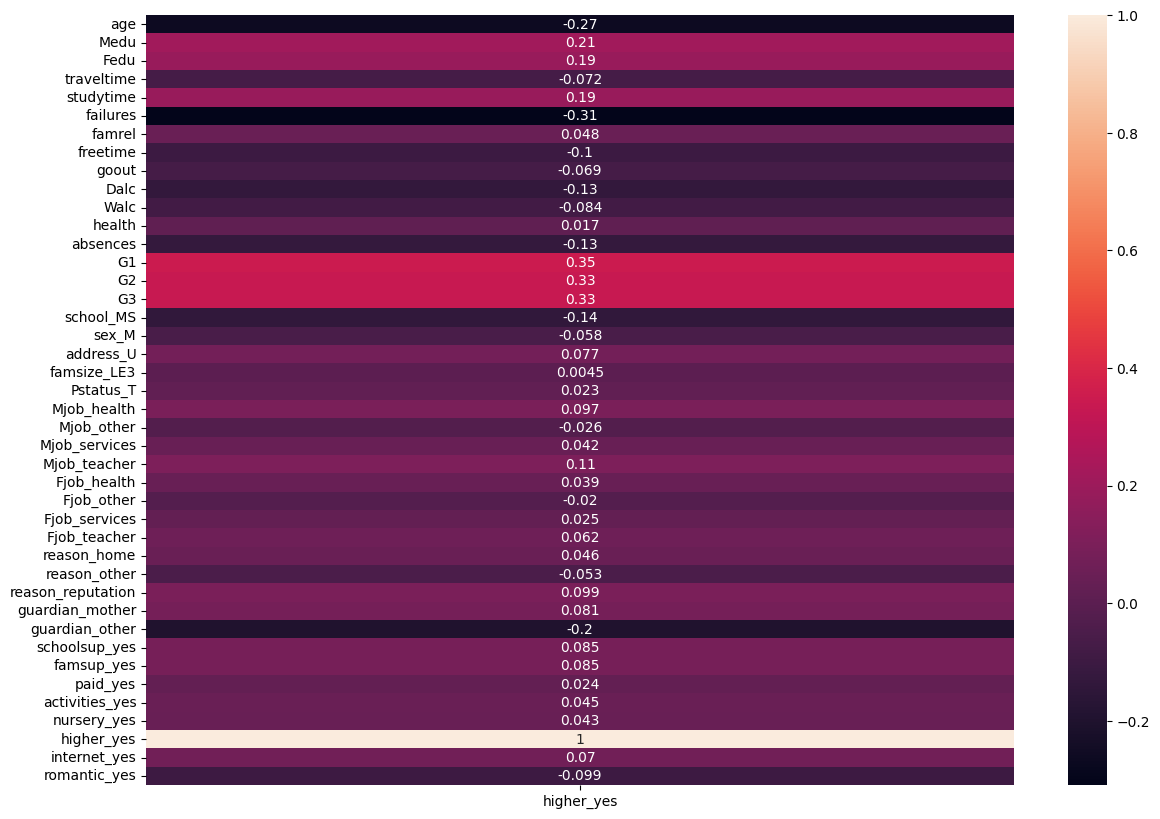

In [17]:
plt.figure(figsize=(14,10))
sns.heatmap(preprocessed_data.corr()[['higher_yes']], annot=True)
plt.show()

In [18]:
x = preprocessed_data.drop('higher_yes', axis=1)
y = preprocessed_data['higher_yes']

In [19]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.2,stratify=y)

In [20]:
model = DecisionTreeClassifier()
model.fit(x_train,y_train)

DecisionTreeClassifier()

In [21]:
model.feature_importances_

array([0.07874708, 0.06423692, 0.05239382, 0.        , 0.0065227 ,
       0.02934535, 0.        , 0.06412438, 0.03321708, 0.01402151,
       0.0101685 , 0.04189769, 0.06173003, 0.18032699, 0.0497203 ,
       0.0599984 , 0.        , 0.        , 0.03253918, 0.01636644,
       0.01779487, 0.        , 0.03050549, 0.04983031, 0.        ,
       0.        , 0.        , 0.03215861, 0.        , 0.        ,
       0.        , 0.01384045, 0.0101685 , 0.00799386, 0.        ,
       0.        , 0.        , 0.0101685 , 0.        , 0.        ,
       0.03218304])

In [22]:
print(preprocessed_data.columns[1])
print(preprocessed_data.columns[10])
print(preprocessed_data.columns[13])

Medu
Walc
G1


In [23]:
preprocessed_data.columns.tolist()

['age',
 'Medu',
 'Fedu',
 'traveltime',
 'studytime',
 'failures',
 'famrel',
 'freetime',
 'goout',
 'Dalc',
 'Walc',
 'health',
 'absences',
 'G1',
 'G2',
 'G3',
 'school_MS',
 'sex_M',
 'address_U',
 'famsize_LE3',
 'Pstatus_T',
 'Mjob_health',
 'Mjob_other',
 'Mjob_services',
 'Mjob_teacher',
 'Fjob_health',
 'Fjob_other',
 'Fjob_services',
 'Fjob_teacher',
 'reason_home',
 'reason_other',
 'reason_reputation',
 'guardian_mother',
 'guardian_other',
 'schoolsup_yes',
 'famsup_yes',
 'paid_yes',
 'activities_yes',
 'nursery_yes',
 'higher_yes',
 'internet_yes',
 'romantic_yes']

In [24]:
training_features = ['Medu','Fedu','studytime','failures','absences','G1','G2','G3','paid_yes']

In [25]:
x = preprocessed_data[training_features]
y = preprocessed_data['higher_yes']

In [26]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.2,stratify=y)

## Build The Models

In [27]:
# Decision Tree
model1 = DecisionTreeClassifier()
model1.fit(x_train,y_train)
print(model1.score(x_test,y_test))

0.8692307692307693


In [28]:
# Random Forest
model2 = RandomForestClassifier()
model2.fit(x_train,y_train)
print(model2.score(x_test,y_test))

0.8769230769230769


In [29]:
# SVM
model3 = SVC()
model3.fit(x_train,y_train)
print(model3.score(x_test,y_test))

0.8923076923076924


In [30]:
# XGBoost
model4 = xgb.XGBClassifier()
model4.fit(x_train,y_train)
print(model4.score(x_test,y_test))

0.8615384615384616


In [31]:
# Logistic Regression
model5 = LogisticRegression()
model5.fit(x_train,y_train)
print(model5.score(x_test,y_test))

0.8769230769230769


In [32]:
# Voting Classifier
votinghard = VotingClassifier(estimators = [('dt',model1), ('rf',model2), ('svm',model3), ('xgb',model4), ('lr',model5)] , voting='hard')
votinghard.fit(x_train,y_train)
print(votinghard.score(x_test,y_test))

0.8769230769230769


In [33]:
# Grid Search_SVM
params_grid = {'C': [0.1,1,10,100], 'gamma' : [1,0.1,0.01,0.001], 'kernel' : ['rbf','linear']}
classifier = GridSearchCV(SVC(), params_grid , cv=5, return_train_score = False)
classifier.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['rbf', 'linear']})

In [34]:
pd.DataFrame(classifier.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.009943,0.000144,0.004410,0.000053,0.1,1.000,rbf,"{'C': 0.1, 'gamma': 1, 'kernel': 'rbf'}",0.894231,0.894231,0.894231,0.894231,0.893204,0.894025,0.000411,1
1,0.004750,0.000562,0.002183,0.000070,0.1,1.000,linear,"{'C': 0.1, 'gamma': 1, 'kernel': 'linear'}",0.894231,0.894231,0.894231,0.894231,0.893204,0.894025,0.000411,1
2,0.006275,0.000252,0.003026,0.000059,0.1,0.100,rbf,"{'C': 0.1, 'gamma': 0.1, 'kernel': 'rbf'}",0.894231,0.894231,0.894231,0.894231,0.893204,0.894025,0.000411,1
3,0.005034,0.000857,0.002303,0.000181,0.1,0.100,linear,"{'C': 0.1, 'gamma': 0.1, 'kernel': 'linear'}",0.894231,0.894231,0.894231,0.894231,0.893204,0.894025,0.000411,1
4,0.005055,0.000193,0.002600,0.000147,0.1,0.010,rbf,"{'C': 0.1, 'gamma': 0.01, 'kernel': 'rbf'}",0.894231,0.894231,0.894231,0.894231,0.893204,0.894025,0.000411,1
5,0.005057,0.000755,0.002234,0.000074,0.1,0.010,linear,"{'C': 0.1, 'gamma': 0.01, 'kernel': 'linear'}",0.894231,0.894231,0.894231,0.894231,0.893204,0.894025,0.000411,1
6,0.005571,0.001683,0.003339,0.001199,0.1,0.001,rbf,"{'C': 0.1, 'gamma': 0.001, 'kernel': 'rbf'}",0.894231,0.894231,0.894231,0.894231,0.893204,0.894025,0.000411,1
7,0.005417,0.001902,0.002363,0.000314,0.1,0.001,linear,"{'C': 0.1, 'gamma': 0.001, 'kernel': 'linear'}",0.894231,0.894231,0.894231,0.894231,0.893204,0.894025,0.000411,1
8,0.010365,0.000313,0.004623,0.000643,1.0,1.000,rbf,"{'C': 1, 'gamma': 1, 'kernel': 'rbf'}",0.894231,0.884615,0.894231,0.894231,0.893204,0.892102,0.003765,25
9,0.006078,0.000520,0.002254,0.000053,1.0,1.000,linear,"{'C': 1, 'gamma': 1, 'kernel': 'linear'}",0.894231,0.894231,0.894231,0.894231,0.893204,0.894025,0.000411,1


In [35]:
classifier.best_params_

{'C': 0.1, 'gamma': 1, 'kernel': 'rbf'}

In [36]:
classifier.best_score_

np.float64(0.8940253920836445)

In [37]:
best_model = classifier.best_estimator_

In [38]:
best_model.score(x_test,y_test)

0.8923076923076924

In [39]:
# Grid Search_XGB
params_grid_xgb = {'n_estimators' : [100,200,300,400], 'learning_rate' : [0.01,0.1,0.2], 'max_depth': [3,4,5,6], 'colsample_bytree' : [0.7,0.,0.9]}
classifier = GridSearchCV(xgb.XGBClassifier(), params_grid_xgb, cv = 5, return_train_score = False)
classifier.fit(x_train,y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, feature_weights=None,
                                     gamma=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=Non...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None, ...),
             param_grid={'colsample_bytree': [0.7, 0.0, 0.9],
                         'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 4, 5, 6],
                         'n_estimators': [100, 200, 300, 400]})

In [40]:
pd.DataFrame(classifier.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_colsample_bytree,param_learning_rate,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.032009,0.013618,0.004557,0.000045,0.7,0.01,3,100,"{'colsample_bytree': 0.7, 'learning_rate': 0.0...",0.894231,0.894231,0.894231,0.894231,0.893204,0.894025,0.000411,15
1,0.046740,0.014098,0.006426,0.003564,0.7,0.01,3,200,"{'colsample_bytree': 0.7, 'learning_rate': 0.0...",0.894231,0.884615,0.894231,0.903846,0.893204,0.894025,0.006095,35
2,0.056813,0.003836,0.005086,0.000329,0.7,0.01,3,300,"{'colsample_bytree': 0.7, 'learning_rate': 0.0...",0.894231,0.903846,0.894231,0.894231,0.902913,0.897890,0.004492,1
3,0.070159,0.001414,0.005326,0.000735,0.7,0.01,3,400,"{'colsample_bytree': 0.7, 'learning_rate': 0.0...",0.884615,0.894231,0.884615,0.884615,0.902913,0.890198,0.007368,56
4,0.036540,0.015444,0.005069,0.000922,0.7,0.01,4,100,"{'colsample_bytree': 0.7, 'learning_rate': 0.0...",0.894231,0.894231,0.894231,0.894231,0.893204,0.894025,0.000411,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,0.091404,0.014008,0.006249,0.002202,0.9,0.20,5,400,"{'colsample_bytree': 0.9, 'learning_rate': 0.2...",0.855769,0.884615,0.865385,0.855769,0.873786,0.867065,0.011056,123
140,0.037323,0.012281,0.004621,0.000205,0.9,0.20,6,100,"{'colsample_bytree': 0.9, 'learning_rate': 0.2...",0.855769,0.875000,0.865385,0.875000,0.893204,0.872872,0.012418,98
141,0.054414,0.002752,0.004863,0.000181,0.9,0.20,6,200,"{'colsample_bytree': 0.9, 'learning_rate': 0.2...",0.846154,0.894231,0.865385,0.865385,0.873786,0.868988,0.015541,112
142,0.069506,0.001437,0.005415,0.000508,0.9,0.20,6,300,"{'colsample_bytree': 0.9, 'learning_rate': 0.2...",0.846154,0.894231,0.875000,0.875000,0.873786,0.872834,0.015362,99


In [41]:
classifier.best_params_

{'colsample_bytree': 0.7,
 'learning_rate': 0.01,
 'max_depth': 3,
 'n_estimators': 300}

In [42]:
classifier.best_score_

np.float64(0.897890216579537)

In [43]:
best_model = classifier.best_params_

## Save The Model

In [44]:
# Save The SVM Model
joblib.dump(model3, 'myjoblibmodel')

['myjoblibmodel']

## Create an interface for the model using Gradio

In [48]:
# make an interface to the model using ( gradio )
model = joblib.load('myjoblibmodel')

def predict_higher_education(Medu, Fedu, studytime, failures, absences, G1, G2, G3, paid_yes):
  input_data = np.array([[Medu, Fedu, studytime, failures, absences, G1, G2, G3, paid_yes]])
  prediction = model.predict(input_data)
  if prediction[0] == 1:
    return "Will Pursue Higher Education"
  else:
    return "Will Not Pursue Higher Education"

# Create Gradio Interface
interface = gr.Interface(
    fn = predict_higher_education,
    inputs = [
        gr.Slider(minimum = 0 , maximum = 4 , step = 1 , label = "Mother's Education (0-4)" ),
        gr.Slider(minimum = 0 , maximum = 4 , step = 1 , label = "Father's Education (0-4)"),
        gr.Slider(minimum = 1 , maximum = 4 , step = 1 , label = "Study Time (1-4)"),
        gr.Slider(minimum = 0 , maximum = 4 , step = 1 , label = "Failures (0-4)"),
        gr.Slider(minimum = 0 , maximum = 93 , step = 1 , label = "Absences (0-93)"),
        gr.Slider(minimum = 0 , maximum = 20 , step = 1 , label = "First Period Grade(0-20)"),
        gr.Slider(minimum = 0 , maximum = 20 , step = 1 , label = "Second Period Grade(0-20)"),
        gr.Slider(minimum = 0 , maximum = 20 , step = 1 , label = "Third Period Grade(0-20)"),
        gr.Radio(["0","1"] , "Paid Extra Classes (0 : No , 1 : Yes)" )
    ],
    outputs = 'text',
    title = 'Student Higher Education Prediction',
    description = "Predict wether a student will pursue higher education on their attributes."
)

interface.launch(inline=True)

It looks like you are running Gradio on a hosted Jupyter notebook, which requires `share=True`. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://e56dea82c2fa890437.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
